import necessary libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# for better visualization
sns.set(style="whitegrid")
%matplotlib inline

Dataset Summary

In [140]:
path = "/Users/fayezullah/Desktop/Coursera/IBM ML:DL:AI course/All Projects/EDA_COURSE_1/Ames_Housing_Data.tsv"
data = pd.read_csv(path, sep='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [141]:
print("The shape of dataset is: ",data.shape)
print("The columns in the dataset is: ", data.columns)
print("The data types of the columns are: ", data.dtypes.value_counts())

#Checking for missing values of each column
missing_Vlaues = data.isnull().sum()
missing_Vlaues = missing_Vlaues[missing_Vlaues > 0].sort_values(ascending=False)
print("The number of missing values in each columns are: \n", missing_Vlaues)  

feature_columns = []
for col in data.columns:
    if col != 'SalePrice':
        feature_columns.append(col)
print("The feature columns are: ", feature_columns)

target_column = 'SalePrice'
print("The target column is: ", target_column)


The shape of dataset is:  (2930, 82)
The columns in the dataset is:  Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
      

Data Exploration Plan

1. Understand the target variables:
* Plot the distribution of the target variable (SalePrice)
* Check the Skewness of the SalePrice. Apply log transformation if data are fully right or left skewed
* Apply descriptive statistics (mean, median, variance, std) for summarization

2. Identify the types of the features:
* Identify the categorical and numerical features

3. Identify the missing values and quantity of each columns
4. Univriate Analysis:
* Plot histogram or boxplots to understand the distributions and outliers of the Numerical features
* Plot bar plots to show the distributions of categorical features

5. Bivariate Analysis:
* plot the scatter plots, correlation heatmaps and group-wise boxplots to identify features with strong relationship to SalePrice

6. Check the multicolinearity by using correlation matrix or variance inflation factor to avoid redundancy
7. Detect outliers by using visual methods like boxplots, scatterplots or statistical methods such as Z-score and IQR


Exploratory Data Analysis (EDA)

In [142]:
#basic statistics of the dataset
print("The basic statistics of the dataset are: \n", data.describe())

The basic statistics of the dataset are: 
             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026    

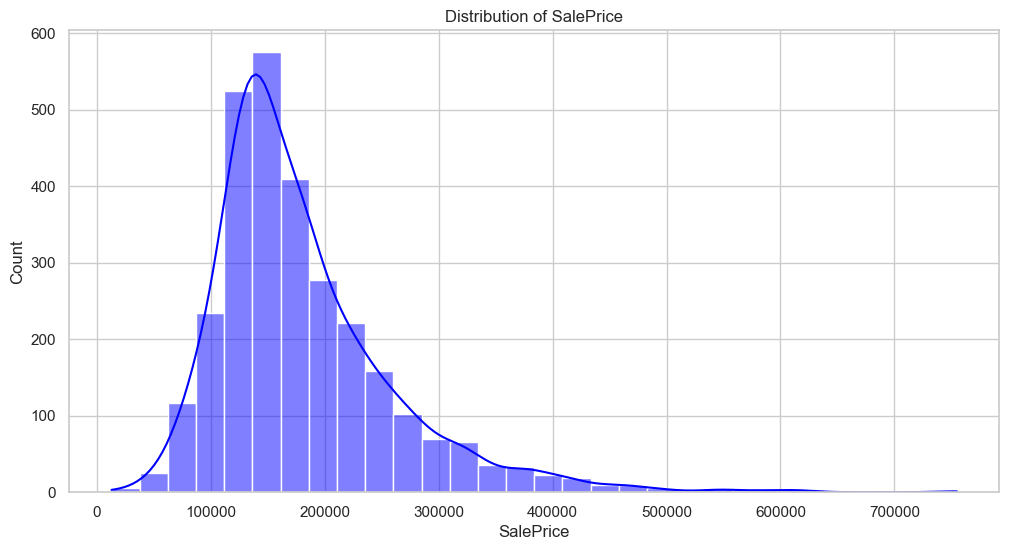

In [143]:
#check histogram and log transform of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(data[target_column], kde=True, color="blue",bins =30)
plt.title("Distribution of SalePrice")
plt.show()

The skewness of the target variable is:  1.7435000757376466


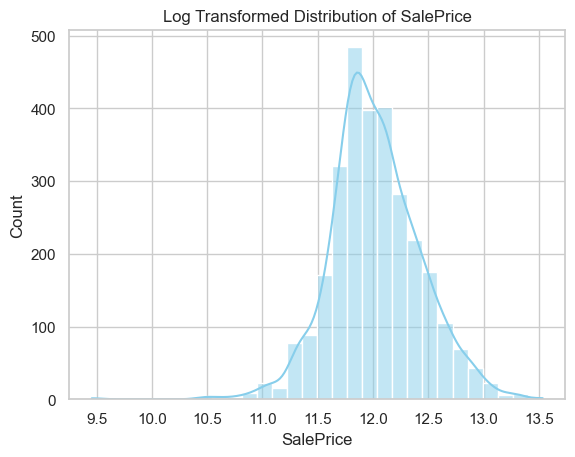

In [144]:
#Check skewness of the target variable
# If the skewness is greater than 0.5, we can apply log transformation
print("The skewness of the target variable is: ", data[target_column].skew())

#Log transform the target variable
data[target_column] = np.log1p(data[target_column])

#Check histogram and log transform of the target variable after log transformation
sns.histplot(data[target_column], kde=True, color="skyblue", bins=30)
plt.title("Log Transformed Distribution of SalePrice")
plt.show()

In [145]:
#Numerical feature correlation with target column
numerical_features = data.select_dtypes(include=['float64', 'int64'])

#correlation with target column
correlation = numerical_features.corr()
top_correlated_features = correlation[target_column].sort_values(ascending=False)
print("Top correlated features with target column: \n", top_correlated_features)

Top correlated features with target column: 
 SalePrice          1.000000
Overall Qual       0.825645
Gr Liv Area        0.695863
Garage Cars        0.675318
Garage Area        0.651132
Total Bsmt SF      0.625099
Year Built         0.615485
1st Flr SF         0.602629
Year Remod/Add     0.586153
Garage Yr Blt      0.580502
Full Bath          0.577335
TotRms AbvGrd      0.492580
Fireplaces         0.488945
Mas Vnr Area       0.448613
BsmtFin SF 1       0.410801
Lot Frontage       0.350224
Wood Deck SF       0.333320
Open Porch SF      0.319938
Half Bath          0.305921
Bsmt Full Bath     0.275249
2nd Flr SF         0.274692
Lot Area           0.255032
Bsmt Unf SF        0.193790
Bedroom AbvGr      0.180503
Screen Porch       0.110425
Pool Area          0.054403
3Ssn Porch         0.040248
Mo Sold            0.038960
BsmtFin SF 2       0.018332
Misc Val          -0.008718
Bsmt Half Bath    -0.020954
Order             -0.028814
Yr Sold           -0.033131
Low Qual Fin SF   -0.044842
Ov

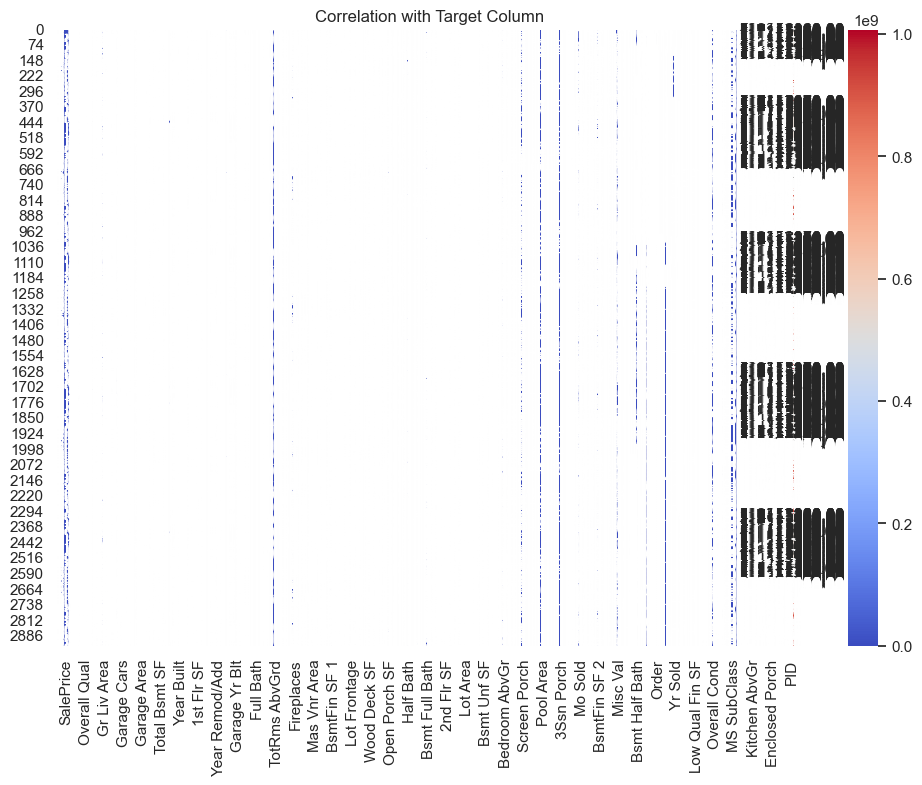

In [146]:
#heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(numerical_features[top_correlated_features.index], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation with Target Column")
plt.show()

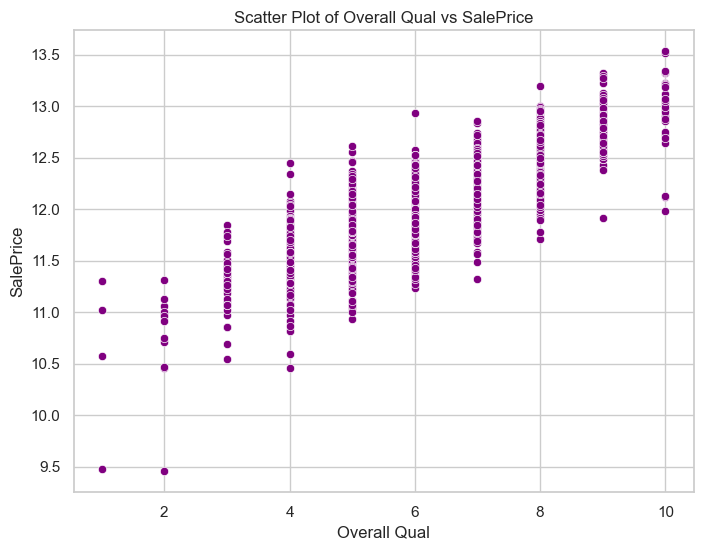

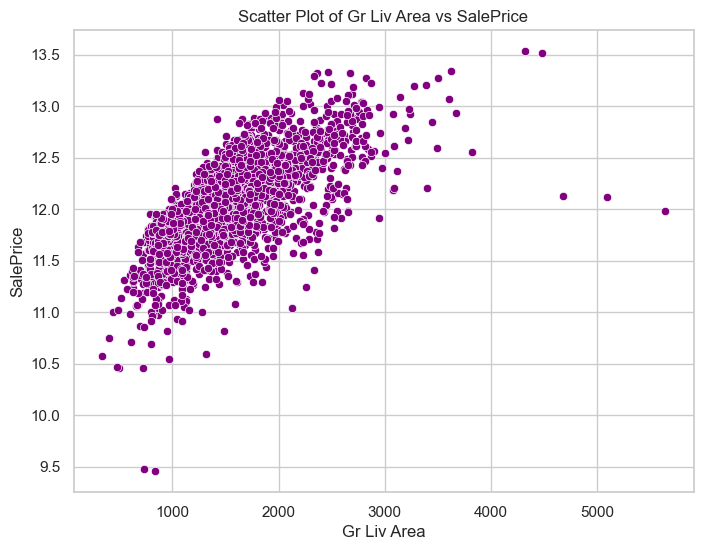

In [147]:
#scatter plots with top correlated features
for feature in top_correlated_features.index[1:3]:  # Exclude the target column itself
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data[target_column], color='purple')
    plt.title(f"Scatter Plot of {feature} vs {target_column}")
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()

/var/folders/k0/xkqq0j_x06v50ftc1hzhv5jw0000gn/T/ipykernel_1503/2190361388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="House Style", y="SalePrice", palette='Set2')


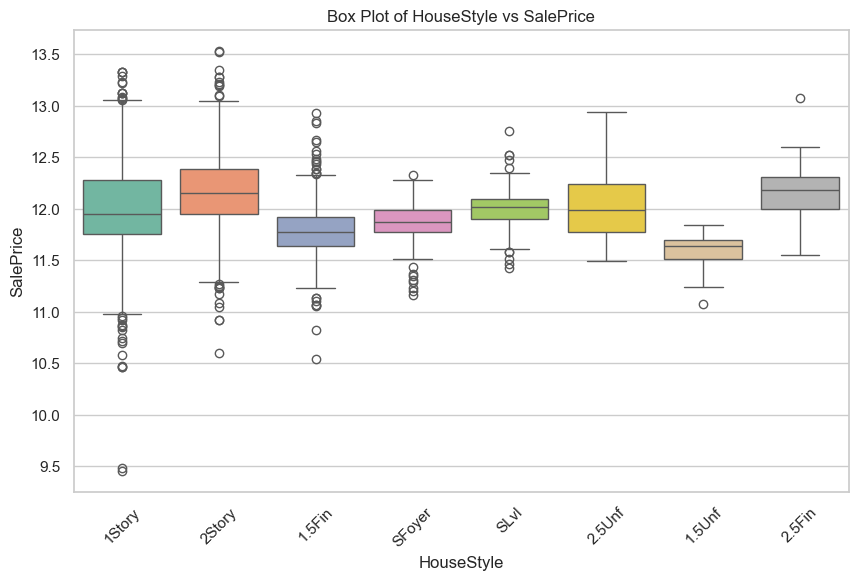

In [148]:
#box plots for categorical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="House Style", y="SalePrice", palette='Set2')
plt.title(f"Box Plot of HouseStyle vs SalePrice")
plt.xlabel('HouseStyle')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()  

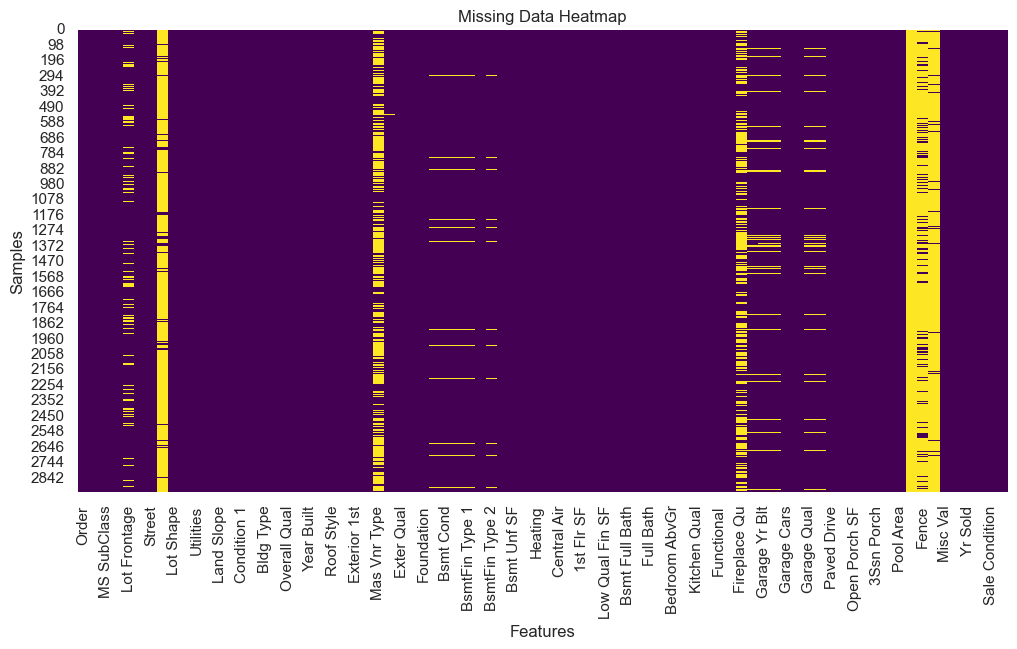

In [149]:
#missing data visualization
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

Data cleaning and Feature Engineering

Cleaning data is important before training the model to improve the model performance. This includes:
* Handling missing values 
* Outliers detections
* Encoding categorical features
* Creating new features

Missing values in the dataset: 
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


/var/folders/k0/xkqq0j_x06v50ftc1hzhv5jw0000gn/T/ipykernel_1503/2129685837.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


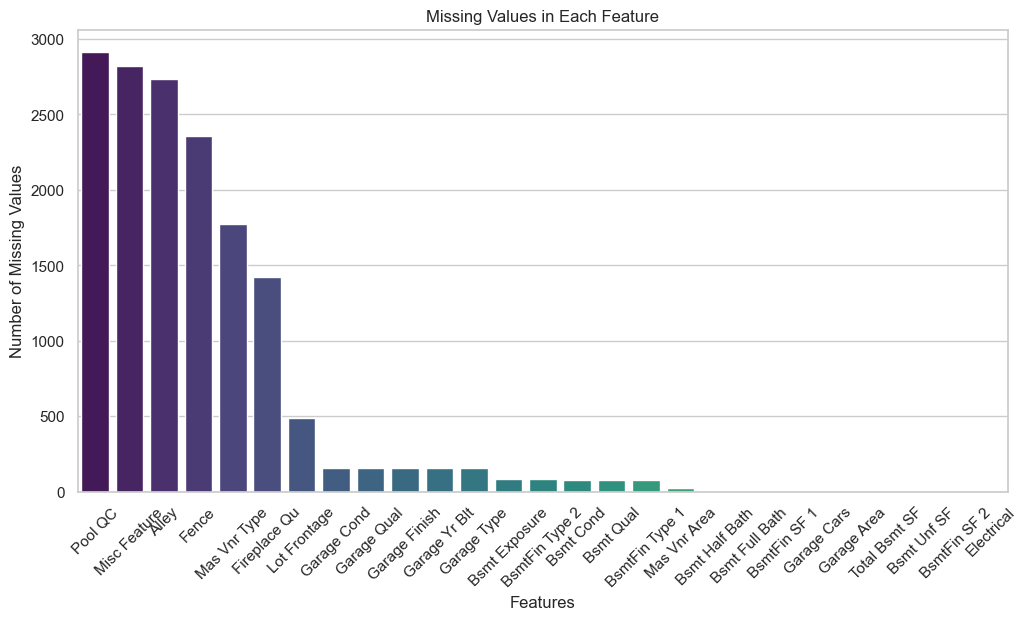

In [150]:
#Check missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing values in the dataset: \n", missing_values)

#Visualize missing values using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title("Missing Values in Each Feature")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [151]:
#Handling the missing values
#The strategies for handling missing values can be:
#1. Drop the columns with more than 50% missing values
threshold = 0.5 * len(data)
columns_to_drop = missing_values[missing_values > threshold].index
data.drop(columns=columns_to_drop, inplace=True)  

 

In [152]:
#2. Fill the missing values with the mean or median of the column for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64'])
for col in numerical_features.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)


#3. Fill the missing values with the mode of the column for categorical features
categorical_features = data.select_dtypes(include=['object'])
for col in categorical_features.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

/var/folders/k0/xkqq0j_x06v50ftc1hzhv5jw0000gn/T/ipykernel_1503/516634177.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/var/folders/k0/xkqq0j_x06v50ftc1hzhv5jw0000gn/T/ipykernel_1503/516634177.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

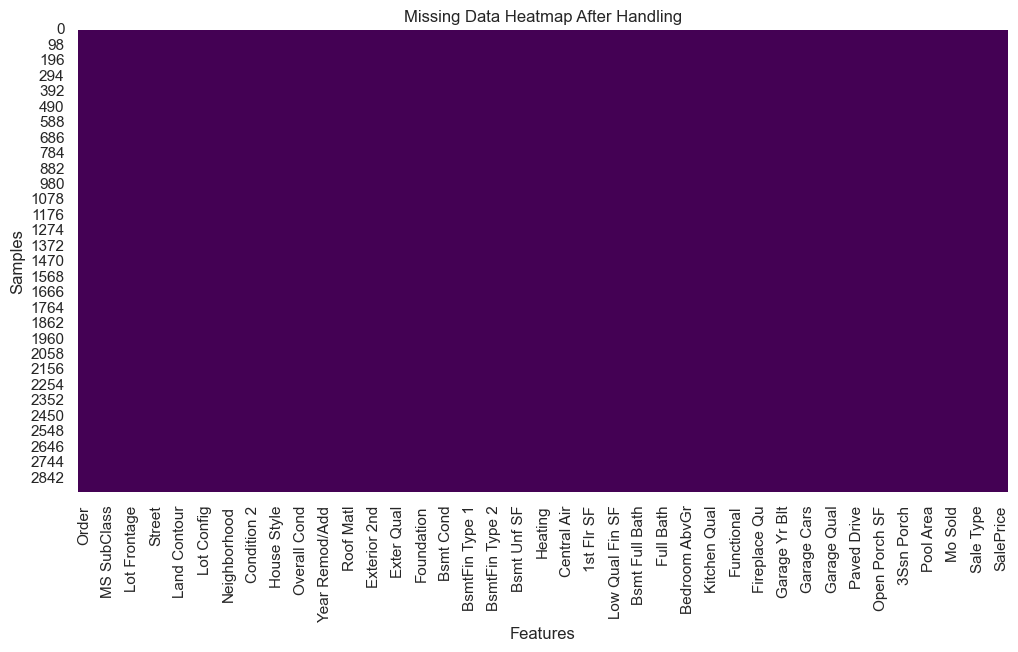

In [153]:
#visualize missing values after handling
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap After Handling")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

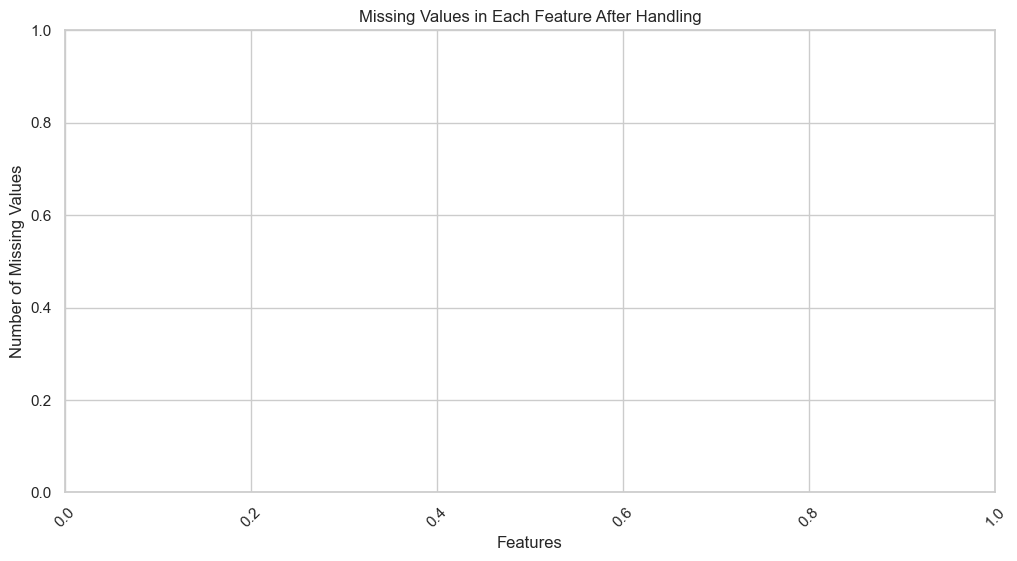

In [154]:
#bar plot of missing values after handling
missing_values_af = data.isnull().sum()
missing_values_af = missing_values_af[missing_values_af > 0].sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_af.index, y=missing_values_af.values, palette='viridis')
plt.title("Missing Values in Each Feature After Handling")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()     



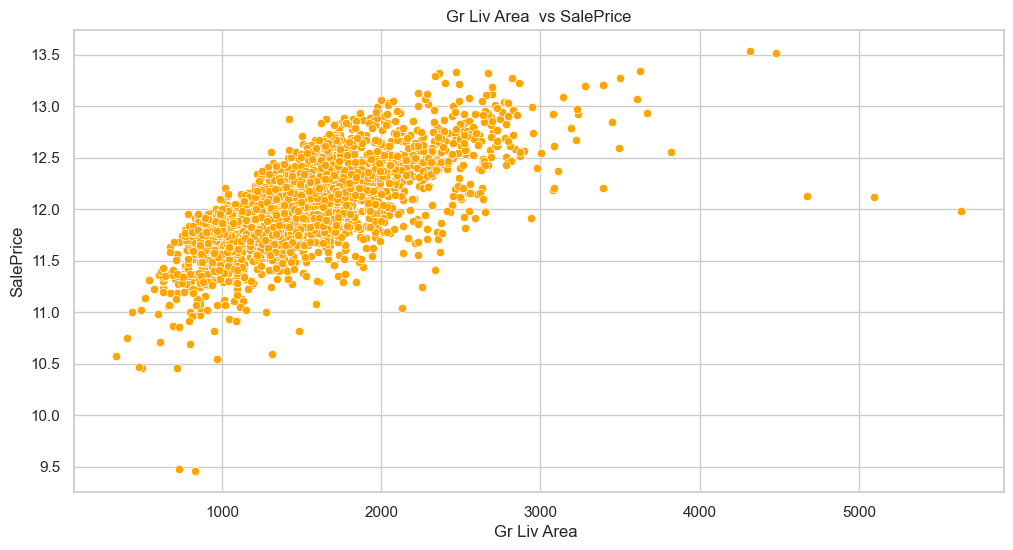

In [155]:
#plotting Gr Liv Area  vs SalePrice for outlier detection
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['Gr Liv Area'], y=data['SalePrice'], color='orange')
plt.title("Gr Liv Area  vs SalePrice")
plt.xlabel("Gr Liv Area ")
plt.ylabel("SalePrice")
plt.show()

In [156]:
#Encoding categorical features
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head(10)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,False,True,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,False,True,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,False,True,False,False,False,True,False
5,6,527105030,60,78.0,9978,6,6,1998,1998,20.0,...,False,False,False,False,True,False,False,False,True,False
6,7,527127150,120,41.0,4920,8,5,2001,2001,0.0,...,False,False,False,False,True,False,False,False,True,False
7,8,527145080,120,43.0,5005,8,5,1992,1992,0.0,...,False,False,False,False,True,False,False,False,True,False
8,9,527146030,120,39.0,5389,8,5,1995,1996,0.0,...,False,False,False,False,True,False,False,False,True,False
9,10,527162130,60,60.0,7500,7,5,1999,1999,0.0,...,False,False,False,False,True,False,False,False,True,False


In [158]:
#there are no nominal columns. we have boolean columns there
boolean_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[boolean_columns] = data_encoded[boolean_columns].astype('int')  #it will convert True/False to 1/0
data_encoded.head(10)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,0,1,0,0,0,1,0
5,6,527105030,60,78.0,9978,6,6,1998,1998,20.0,...,0,0,0,0,1,0,0,0,1,0
6,7,527127150,120,41.0,4920,8,5,2001,2001,0.0,...,0,0,0,0,1,0,0,0,1,0
7,8,527145080,120,43.0,5005,8,5,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0
8,9,527146030,120,39.0,5389,8,5,1995,1996,0.0,...,0,0,0,0,1,0,0,0,1,0
9,10,527162130,60,60.0,7500,7,5,1999,1999,0.0,...,0,0,0,0,1,0,0,0,1,0


Key finding and insights

1. Target variables
* The target variable SalePrice is Left skewed. For normal distributions of SalePrice, applied log transformation for better performance.

2. Strongest Predictors of SalePrice
* Base on Correlation and visual analysis the OverAllQual is the strongest predictor of SalePrice which is mostly correlated with SalePrice.
* The other strong predictors are GrLivArea, Garage Cars, Garage Area.

3. Outliers
* A few houses had extremely large living area with low prices which could distort model learning. These shoulb be removed before model training as well.

4. Missing values handling
* The columns whose had missing values more than 50%, were removed. Whereas the missing values of numerical columns filled with mean values and categorical values filled with mode. 
* After handling the missing values, there were no missing values in the dataset

5. Encoding
* The categorical values were converted to the numerical values and the boolean values were also converted into 1/0 

Hypothesis Formualtion

Hypotheis-1: overall Quality vs. SalePrice
* H0 (Null Hypothesis): There is no difference in average SalePrice between houses of different OverallQual.
* H1 (Alternative Hypothesis): Houses with higher OverallQual have a significantly higher average SalePrice.

Hypotheis-2:  Garage Presence Impact
* H0 (Null Hypothesis): The presence of a garage does not affect the average SalePrice.
* H1 (Alternative Hypothesis): Houses with a garage sell for more than houses without one.

Hypotheis-2:  Neighborhood Price Difference
* H0 (Null Hypothesis): There is no difference in SalePrice across different neighborhoods.
* H1 (Alternative Hypothesis): SalePrice varies significantly between neighborhoods.

Hypothesis Testing and significance analysis


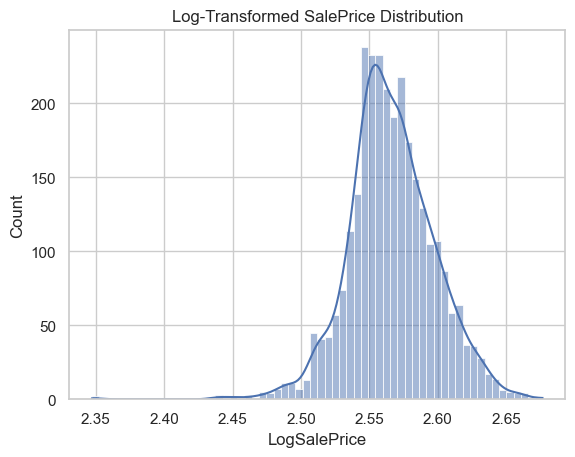

In [159]:
# Log transform SalePrice if skewed
data['LogSalePrice'] = np.log1p(data['SalePrice'])

# Histogram to visualize
sns.histplot(data['LogSalePrice'], kde=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.show()

In [161]:
# Levene's test (equal variances)
groups = [group["LogSalePrice"].values for name, group in data.groupby("Overall Qual")]

from scipy import stats
stat, p_levene = stats.levene(*groups)
print("Levene’s Test p-value:", p_levene)

Levene’s Test p-value: 4.450366742261153e-19


* If p > 0.05, variances are equal — ANOVA is valid.
* If p ≤ 0.05, variances are unequal — use Kruskal-Wallis instead.

In [162]:
kw_stat, p_kw = stats.kruskal(*groups)
print("Kruskal-Wallis p-value:", p_kw)

Kruskal-Wallis p-value: 0.0


Conclusion and Next steps

1. Conclusion:
In this project, I explored the Ames Housing dataset to uncover insights that influence housing prices. The analysis included:

* Data Cleaning: All missing values were handled through appropriate imputation or transformation. Boolean features were encoded, and no missing values remained in the final dataset.
* Exploratory Data Analysis (EDA): The target variable SalePrice was found to be highly skewed, and a log transformation was applied. Key features such as OverallQual, GrLivArea, TotalSF, and GarageCars were strongly correlated with price. Categorical variables like HouseStyle and Neighborhood also showed meaningful group-wise differences.
* Hypothesis Testing: A Kruskal-Wallis test showed a statistically significant relationship between OverallQual and SalePrice (p < 0.001), confirming that quality rating is a major determinant of price.


2. Next steps:

To extend this analysis into a machine learning task:

* Feature Scaling: Normalize or standardize numerical features to improve model performance.
* Modeling: Train and compare regression models such as:
Linear Regression,
Random Forest Regressor and 
XGBoost / Gradient Boosting
* Cross-Validation: Use k-fold cross-validation to validate model robustness.
* Hyperparameter Tuning: Use GridSearchCV or RandomizedSearchCV to optimize model parameters.
* Model Interpretation: Use SHAP or permutation importance to interpret predictions.
* Deployment: Build a simple web app (e.g., using Streamlit) to deploy the model and allow users to predict house prices.